(1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [46]:
from sklearn.datasets import load_diabetes   # 사이킷 런에서는 번치라는 데이터셋을 제공한다!
import matplotlib.pyplot as plt

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)
print(type(diabetes))   # 정답라벨이 따로 존재! - (.data, .target) bunch는 dict와 비슷하게 키와 벨류(데이터, 타겟)
print(diabetes.feature_names)   # 괄호를 치는 것은 함수, 자료(변수명)의 데이터를 볼때는 안친다?
print(df_X)
print(type(df_X))

(442, 10)
(442,)
<class 'sklearn.utils.Bunch'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
<class 'numpy.ndarray'>


(2) 모델에 입력할 데이터 X 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [47]:
import numpy as np
X = np.array(df_X)
print(type(X))

<class 'numpy.ndarray'>


(3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [48]:
y = np.array(df_y)

(4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(353, 10)


(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [50]:
w = np.random.rand(X_train.shape[1])
b = np.random.rand()
print(w)

def model(x, w, b):
    predictions = x.dot(w) + b
    return predictions

[0.34444981 0.62777381 0.86512366 0.45509179 0.38205322 0.70526956
 0.40521678 0.55271141 0.55299516 0.80262072]


(6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [51]:
def MSE(a, b):
    return ((a - b) ** 2).mean()

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [52]:
def gradient(X, w, b, y):
    # N은 데이터 포인트의 개수입니다.
    # len(y)는 타깃 벡터 y의 길이, 즉 샘플 데이터의 개수를 반환합니다.
    N = len(y)
    
    # y_pred는 모델의 예측값입니다.
    # model 함수는 입력 데이터 X, 가중치 W, 절편 b를 사용하여 예측값을 계산합니다.
    y_pred = model(X, w, b)
    
    # 손실 함수(Loss Function)의 가중치 W에 대한 그래디언트 dW를 계산합니다.
    # 이는 평균 제곱 오차(Mean Squared Error)를 사용하는 선형 회귀에서 그래디언트를 계산하는 방법입니다.
    # 1/N * 2는 미분 과정에서 생기는 상수 항이며, X.T.dot(y_pred - y)는 실제값 y와 예측값 y_pred의 차이에 데이터 X를 행렬 곱셈합니다.
    dw = 1/N * 2 * X.T.dot(y_pred - y)  # 내적
        
    # 절편 b에 대한 그래디언트 db를 계산합니다.
    # (y_pred - y).mean()는 예측값과 실제값의 차이의 평균을 계산하고, 2를 곱하여 그래디언트를 구합니다.
    db = 2 * (y_pred - y).mean()
    return dw, db

(8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [53]:
learning_rate = 0.01

(9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [54]:
losses = []
for i in range(1, 30001):
    dw, db = gradient(X, w, b, y)
    w -= learning_rate * dw
    b -= learning_rate * db
    L = loss(X, w, b, y)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 5251.8342
Iteration 2000 : Loss 4766.1026
Iteration 3000 : Loss 4407.5209
Iteration 4000 : Loss 4139.2439
Iteration 5000 : Loss 3935.4818
Iteration 6000 : Loss 3778.1452
Iteration 7000 : Loss 3654.5118
Iteration 8000 : Loss 3555.6034
Iteration 9000 : Loss 3475.0574
Iteration 10000 : Loss 3408.3405
Iteration 11000 : Loss 3352.2018
Iteration 12000 : Loss 3304.2911
Iteration 13000 : Loss 3262.8930
Iteration 14000 : Loss 3226.7415
Iteration 15000 : Loss 3194.8898
Iteration 16000 : Loss 3166.6194
Iteration 17000 : Loss 3141.3764
Iteration 18000 : Loss 3118.7264
Iteration 19000 : Loss 3098.3228
Iteration 20000 : Loss 3079.8844
Iteration 21000 : Loss 3063.1791
Iteration 22000 : Loss 3048.0124
Iteration 23000 : Loss 3034.2192
Iteration 24000 : Loss 3021.6575
Iteration 25000 : Loss 3010.2039
Iteration 26000 : Loss 2999.7504
Iteration 27000 : Loss 2990.2013
Iteration 28000 : Loss 2981.4719
Iteration 29000 : Loss 2973.4866
Iteration 30000 : Loss 2966.1775


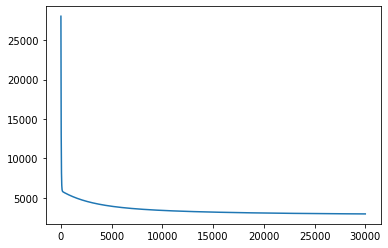

In [55]:
plt.plot(losses)
plt.show()

(10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [56]:
y_pred = model(X_test, w, b)
mse = MSE(y_pred, y_test)
print("Test MSE: ", mse)

Test MSE:  2815.0531700710353


(11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

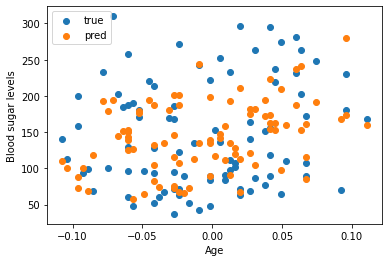

In [57]:
import matplotlib.pyplot as plt
# x = np.linspace(-0.1, 0.1, 6)
# y = model(X, w, b)
# plt.plot(y, c="r")
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], y_pred, label='pred')
plt.xlabel('Age')
plt.ylabel('Blood sugar levels')
plt.legend()
plt.show()